In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Communities & Crime Un-normalized dataset

Communities in the US. Data combines socio-economic data from the '90 Census, law enforcement data from the 1990 Law Enforcement Management and Admin Stats survey, and crime data from the 1995 FBI UCR

This dataset consists of 2215 instances of crimes that has been reported from across all the states in the United States of America

Total number of features  = 147

<br/>
5 - Non-predictive features

-- communityname: Community name - not predictive - for information only (string) 
<br/>
-- state: US state (by 2 letter postal abbreviation)(nominal) 
<br/>
-- countyCode: numeric code for county - not predictive, and many missing values (numeric) 
<br/>
-- communityCode: numeric code for community - not predictive and many missing values (numeric) 
<br/>
-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric - integer) 
<br/>

124 - Predictive features : More details on these can be found [here](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized)
<br/>

18 potential goal features which are listed below

## Potential Goal features : To be predicted

-- murders: number of murders in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
<br />
-- murdPerPop: number of murders per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
<br />
-- rapes: number of rapes in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- rapesPerPop: number of rapes per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- robberies: number of robberies in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- robbbPerPop: number of robberies per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- assaults: number of assaults in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- assaultPerPop: number of assaults per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- burglaries: number of burglaries in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- burglPerPop: number of burglaries per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- larcenies: number of larcenies in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- larcPerPop: number of larcenies per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- autoTheft: number of auto thefts in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- autoTheftPerPop: number of auto thefts per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- arsons: number of arsons in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- arsonsPerPop: number of arsons per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted) 
<br />
-- nonViolPerPop: total number of non-violent crimes per 100K popuation (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from scipy import stats, optimize
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.pipeline import Pipeline

from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import explained_variance_score, r2_score, median_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The numpy version is {}.'.format(np.__version__))

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The scikit-learn version is 0.18.1.
The pandas version is 0.19.2.
The numpy version is 1.12.1.


In [3]:
goal_features = ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies','robbbPerPop',
                 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop',
                 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop']

non_predictive_features = ['communityname', 'state', 'countyCode', 'communityCode', 'fold']

In [4]:
df = pd.read_csv('../datasets/UnnormalizedCrimeData.csv');
df = df.replace('?',np.NAN)
features = [x for x in df.columns if x not in goal_features and x not in non_predictive_features]
len(features)

124

In [ ]:
df.isnull().sum()

In [ ]:
df[goal_features].isnull().sum()

In [5]:
def drop_rows_with_null_goal_feature(old_df, feature):
    new_df = old_df.dropna(subset=[feature])
    return new_df

# Scores with and without Imputing values

## Without imputing missing values and just dropping them

In [6]:
missing_smaples_df = df.dropna()

Now, that we have dropped all the rows with missing values, let us calculate the cross validated scores for all the goals

### Initialize the LinearRegression estimator

In [7]:
estimator = LinearRegression()

### Accuracy for 'murders'

In [8]:
#estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, missing_smaples_df[features], missing_smaples_df['murders']).mean()
print("Score after dropping all the rows with missing values for murders = %.2f" % score)

Score after dropping all the rows with missing values for murders = 0.61


### Accuracy for 'murPerPop'

In [9]:
#estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, missing_smaples_df[features], missing_smaples_df['murdPerPop']).mean()
print("Score after dropping all the rows with missing values for murdPerPop = %.2f" % score)

Score after dropping all the rows with missing values for murdPerPop = -0.52


### Accuracy for 'rapes'

In [10]:
#estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, missing_smaples_df[features], missing_smaples_df['rapes']).mean()
print("Score after dropping all the rows with missing values for rapes = %.2f" % score)

Score after dropping all the rows with missing values for rapes = 0.03


### Accuracy for 'rapesPerPop'

In [11]:
#estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, missing_smaples_df[features], missing_smaples_df['rapesPerPop']).mean()
print("Score after dropping all the rows with missing values for rapesPerPop = %.2f" % score)

Score after dropping all the rows with missing values for rapesPerPop = -1.77


## Imputing missing values by the mean

### Define the estimator as a Pipeline :
We use sklearn's pipeline to define the estimator. 

In [12]:
estimator = Pipeline([("imputer", Imputer(missing_values='NaN',
                                          strategy="mean",
                                          axis=0)),
                      ("scaler", StandardScaler()),
                      ("linearRegression", LinearRegression())])

### Accuracy for 'murders' after imputation

In [13]:
murders_df = drop_rows_with_null_goal_feature(df, 'murders')
score = cross_val_score(estimator, murders_df[features], murders_df['murders']).mean()
print("Score after imputation of the missing values = %.2f" % score) 

Score after imputation of the missing values = 0.75


### Accuracy for 'murdPerPop' after imputation

In [14]:
murders_perpop_df = drop_rows_with_null_goal_feature(df, 'murdPerPop')
score = cross_val_score(estimator, murders_perpop_df[features], murders_perpop_df['murdPerPop']).mean()
print("Score after imputation of the missing values = %.2f" % score)

Score after imputation of the missing values = 0.47


### Accuracy for 'rapes' after imputation

In [15]:
rapes_df = drop_rows_with_null_goal_feature(df, 'rapes')
score = cross_val_score(estimator, rapes_df[features], rapes_df['rapes']).mean()
print("Score after imputation of the missing values = %.2f" % score)

Score after imputation of the missing values = 0.78


### Accuracy for 'rapesPerPop' after imputation

In [16]:
rapes_perpop_df = drop_rows_with_null_goal_feature(df, 'rapesPerPop')
score = cross_val_score(estimator, rapes_perpop_df[features], rapes_perpop_df['rapesPerPop']).mean()
print("Score after imputation of the missing values = %.2f" % score)

Score after imputation of the missing values = 0.11


## Recursive Feature Elimination to get the best features

For each of the goal variable, we use the Recursive Feature Elimination technique to get a cross-validated score and plot the graph to get the optimal number of features for each.

In [42]:
def plot_RFECV_scores(estimator, list_of_goal_features, df, score):
    rfecv = RFECV(estimator=estimator, step=1, scoring=score)
    for goal in list_of_goal_features:
        final_features = []
        filtered_df = drop_rows_with_null_goal_feature(df, goal)

        imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
        imr = imr.fit(filtered_df[features])

        imputed_data = imr.transform(filtered_df[features]);
        rfecv.fit(imputed_data, filtered_df[goal])
        print("Optimal number of features : %d" % rfecv.n_features_)  
        # Plot number of features VS. cross-validation scores
          #print "Ranking is ", rfecv.support_
        for x, y in zip(filtered_df[features].columns, rfecv.support_):
            if y:
                final_features.append(x)
        print final_features
        plt.figure()
        plt.xlabel("Number of features selected")
        plt.ylabel("Cross validation "+score)
        plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
        plt.title(goal+": Optimal number of features : %d" % rfecv.n_features_)
        plt.show()

Optimal number of features : 96
['perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'perCapInc', 'whitePerCap', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm', 'pctHousOccup', 'pctHousOwnerOccup', 'pctVacantBoarded', 'p

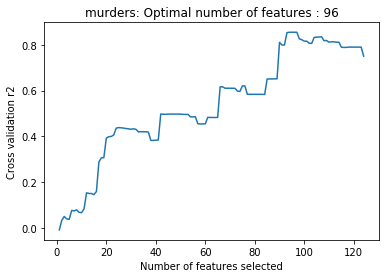

Optimal number of features : 100
['perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'pctFgnImmig-3', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm', 'houseVacant', 'pctHousOccup', 'pctHousOwnerOccup', 'pctVacantBoarded', 'pctVacant6up'

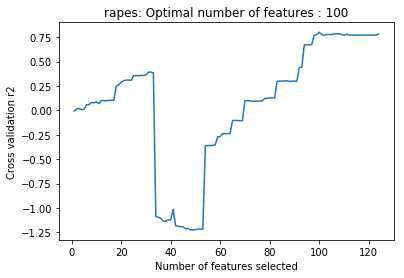

Optimal number of features : 124
['pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'pe

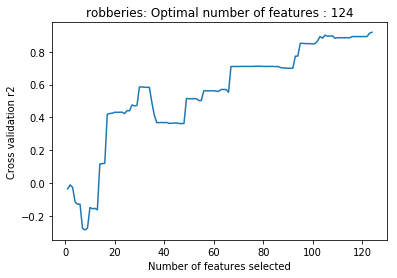

Optimal number of features : 115
['perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'asianPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'pctPersOwnOccup', 'pctP

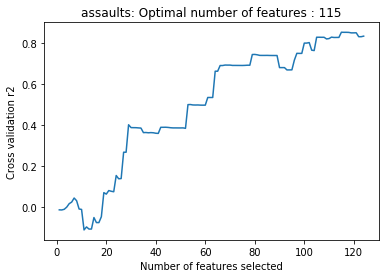

Optimal number of features : 106
['pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'perCapInc', 'whitePerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm', 'houseVacant', 'pct

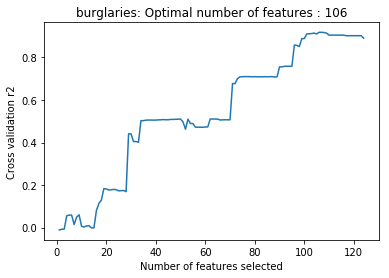

In [43]:
estimator = LinearRegression()
final_goals = ['murders', 'rapes', 'robberies', 'assaults', 'burglaries']
plot_RFECV_scores(estimator , final_goals, df, 'r2')

Optimal number of features : 96
['perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'perCapInc', 'whitePerCap', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm', 'pctHousOccup', 'pctHousOwnerOccup', 'pctVacantBoarded', 'p

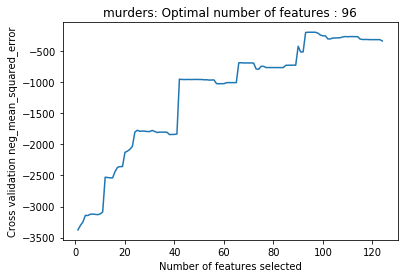

Optimal number of features : 100
['perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'pctFgnImmig-3', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm', 'houseVacant', 'pctHousOccup', 'pctHousOwnerOccup', 'pctVacantBoarded', 'pctVacant6up'

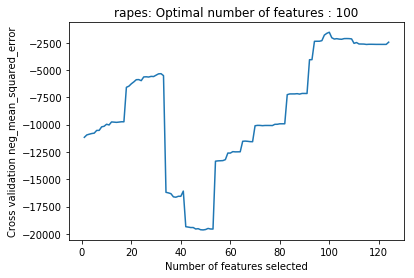

Optimal number of features : 108
['pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'perCapInc', 'whitePerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm', '

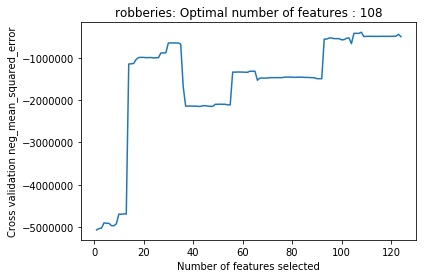

Optimal number of features : 116
['perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'asianPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'pctPersOwnOccup', 'pctP

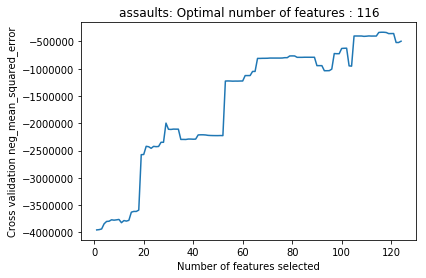

Optimal number of features : 103
['perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'pctUrban', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'perCapInc', 'whitePerCap', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm', 'houseVacant', 'pctHousOccup', 'pctHousOw

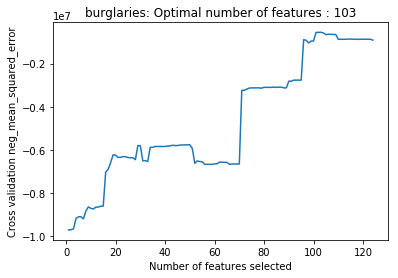

In [44]:
estimator = LinearRegression()
final_goals = ['murders', 'rapes', 'robberies', 'assaults', 'burglaries']
plot_RFECV_scores(estimator , final_goals, df, 'neg_mean_squared_error')